<div><h2><b><center>MANOJ KUMAR - 2048015</b></h2></div>
<div><h3><b><center>Lab 10: Naive Bayes (NB) Classification</b></h3></div>

    Kidney diseases are disorders that affect the functions of the kidney. During the late stages, kidney diseases can cause kidney failure to prevent chronic kidney disease-CKD by utilising machine learning techniques to diagnose kidney disease at an early stage. We describe the most prominent supervised machine learning algorithms (SML), their characteristics, Generalisation capacity of each method, Time complexity, Hyper-parameter tuning, and Advantages and disadvantages of each technique comparatively. 
    
    The Kidney Disease dataset obtained from UCI was used to determine and test its highest percentage of accuracy and benchmark.


###### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

###### Reading the dataset

In [2]:
ckd_df = pd.read_csv('kidney_disease.csv')

#Check the shape
print(ckd_df.shape)

(400, 26)


In [3]:
#check the columns
ckd_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

###### Rename the columns to have meaningful names

In [4]:
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

ckd_df.rename(columns=col_dict, inplace=True)

#Check the column names again
ckd_df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

###### Observing the data

In [5]:
ckd_df.head(11).T

0           1           2           3  \
id                                0           1           2           3   
age                              48           7          62          48   
blood_pressure                   80          50          80          70   
specific_gravity               1.02        1.02        1.01       1.005   
albumin                           1           4           2           4   
sugar                             0           0           3           0   
red_blood_cells                 NaN         NaN      normal      normal   
pus_cell                     normal      normal      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent     present   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random            121         NaN         423         117   
blood_urea                       36          18          53          56   
serum_creatinine                1.2         0.8         1.8         3.8   
sodium                          NaN         NaN         NaN         111   
potassium                       NaN         NaN         NaN         2.5   
hemoglobin                     15.4        11.3         9.6        11.2   
packed_cell_volume               44          38          31          32   
white_blood_cell_count         7800        6000        7500        6700   
red_blood_cell_count            5.2         NaN         NaN         3.9   
hypertension                    yes          no          no         yes   
diabetes_mellitus               yes          no         yes          no   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        poor        poor   
pedal_edema                      no          no          no         yes   
anemia                           no          no         yes         yes   
classification                  ckd         ckd         ckd         ckd   

                                  4           5           6           7  \
id                                4           5           6           7   
age                              51          60          68          24   
blood_pressure                   80          90          70         NaN   
specific_gravity               1.01       1.015        1.01       1.015   
albumin                           2           3           0           2   
sugar                             0           0           0           4   
red_blood_cells              normal         NaN         NaN      normal   
pus_cell                     normal         NaN      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent  notpresent   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random            106          74         100         410   
blood_urea                       26          25          54          31   
serum_creatinine                1.4         1.1          24         1.1   
sodium                          NaN         142         104         NaN   
potassium                       NaN         3.2           4         NaN   
hemoglobin                     11.6        12.2        12.4        12.4   
packed_cell_volume               35          39          36          44   
white_blood_cell_count         7300        7800         NaN        6900   
red_blood_cell_count            4.6         4.4         NaN           5   
hypertension                     no         yes          no          no   
diabetes_mellitus                no         yes          no         yes   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        good        good   
pedal_edema                      no         yes          no         yes   
anemia                           no          no          no          no   
classification                  ckd         ckd         ck

##### Data DeepDive

In [6]:
for i in ckd_df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),ckd_df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

In [7]:
#Replace incorrect values
ckd_df['diabetes_mellitus'] =ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')
ckd_df["classification"]=ckd_df["classification"].replace("ckd\t", "ckd")

for i in range(ckd_df.shape[0]):
    if ckd_df.iloc[i,16]=='\t?':
        ckd_df.iloc[i,16]=np.nan
    if ckd_df.iloc[i,16]=='\t43':
        ckd_df.iloc[i,16]='43'
    if ckd_df.iloc[i,17]=='\t?':
        ckd_df.iloc[i,17]=np.nan
    if ckd_df.iloc[i,17]=='\t6200':
        ckd_df.iloc[i,17]= '6200'
    if ckd_df.iloc[i,18]=='\t?':
        ckd_df.iloc[i,18]=np.nan
    if ckd_df.iloc[i,25]=='ckd':
        ckd_df.iloc[i,25]='1'
    if ckd_df.iloc[i,25]=='notckd':
        ckd_df.iloc[i,25]='0'

for i in ckd_df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),ckd_df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

In [8]:
# Observing the summarized information of data
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [9]:
ckd_df.iloc[:,-1]=ckd_df.iloc[:,-1].astype('int64')
ckd_df.head(11).T

0           1           2           3  \
id                                0           1           2           3   
age                              48           7          62          48   
blood_pressure                   80          50          80          70   
specific_gravity               1.02        1.02        1.01       1.005   
albumin                           1           4           2           4   
sugar                             0           0           3           0   
red_blood_cells                 NaN         NaN      normal      normal   
pus_cell                     normal      normal      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent     present   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random            121         NaN         423         117   
blood_urea                       36          18          53          56   
serum_creatinine                1.2         0.8         1.8         3.8   
sodium                          NaN         NaN         NaN         111   
potassium                       NaN         NaN         NaN         2.5   
hemoglobin                     15.4        11.3         9.6        11.2   
packed_cell_volume               44          38          31          32   
white_blood_cell_count         7800        6000        7500        6700   
red_blood_cell_count            5.2         NaN         NaN         3.9   
hypertension                    yes          no          no         yes   
diabetes_mellitus               yes          no         yes          no   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        poor        poor   
pedal_edema                      no          no          no         yes   
anemia                           no          no         yes         yes   
classification                    1           1           1           1   

                                  4           5           6           7  \
id                                4           5           6           7   
age                              51          60          68          24   
blood_pressure                   80          90          70         NaN   
specific_gravity               1.01       1.015        1.01       1.015   
albumin                           2           3           0           2   
sugar                             0           0           0           4   
red_blood_cells              normal         NaN         NaN      normal   
pus_cell                     normal         NaN      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent  notpresent   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random            106          74         100         410   
blood_urea                       26          25          54          31   
serum_creatinine                1.4         1.1          24         1.1   
sodium                          NaN         142         104         NaN   
potassium                       NaN         3.2           4         NaN   
hemoglobin                     11.6        12.2        12.4        12.4   
packed_cell_volume               35          39          36          44   
white_blood_cell_count         7300        7800         NaN        6900   
red_blood_cell_count            4.6         4.4         NaN           5   
hypertension                     no         yes          no          no   
diabetes_mellitus                no         yes          no         yes   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        good        good   
pedal_edema                      no         yes          no         yes   
anemia                           no          no          no          no   
classification                    1           1           

In [10]:
print(ckd_df['packed_cell_volume'].unique())
print(ckd_df['white_blood_cell_count'].unique())
print(ckd_df['red_blood_cell_count'].unique())

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900'
 '9300' '9700' '5100' '6600']
['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '

In [11]:
mistyped=['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for col in mistyped:
        ckd_df[col]=ckd_df[col].astype('float')
                
numeric=[]
for i in ckd_df.columns:
    if ckd_df[i].dtype=='float64':
        numeric.append(i)

numeric 

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [12]:
ckd_df.drop('id',axis=1,inplace=True)

categoricals=[]

for col in ckd_df.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('classification')

categoricals

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia']

In [13]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.style as style
style.use('fivethirtyeight')

##### Checking distribution of the numerical features

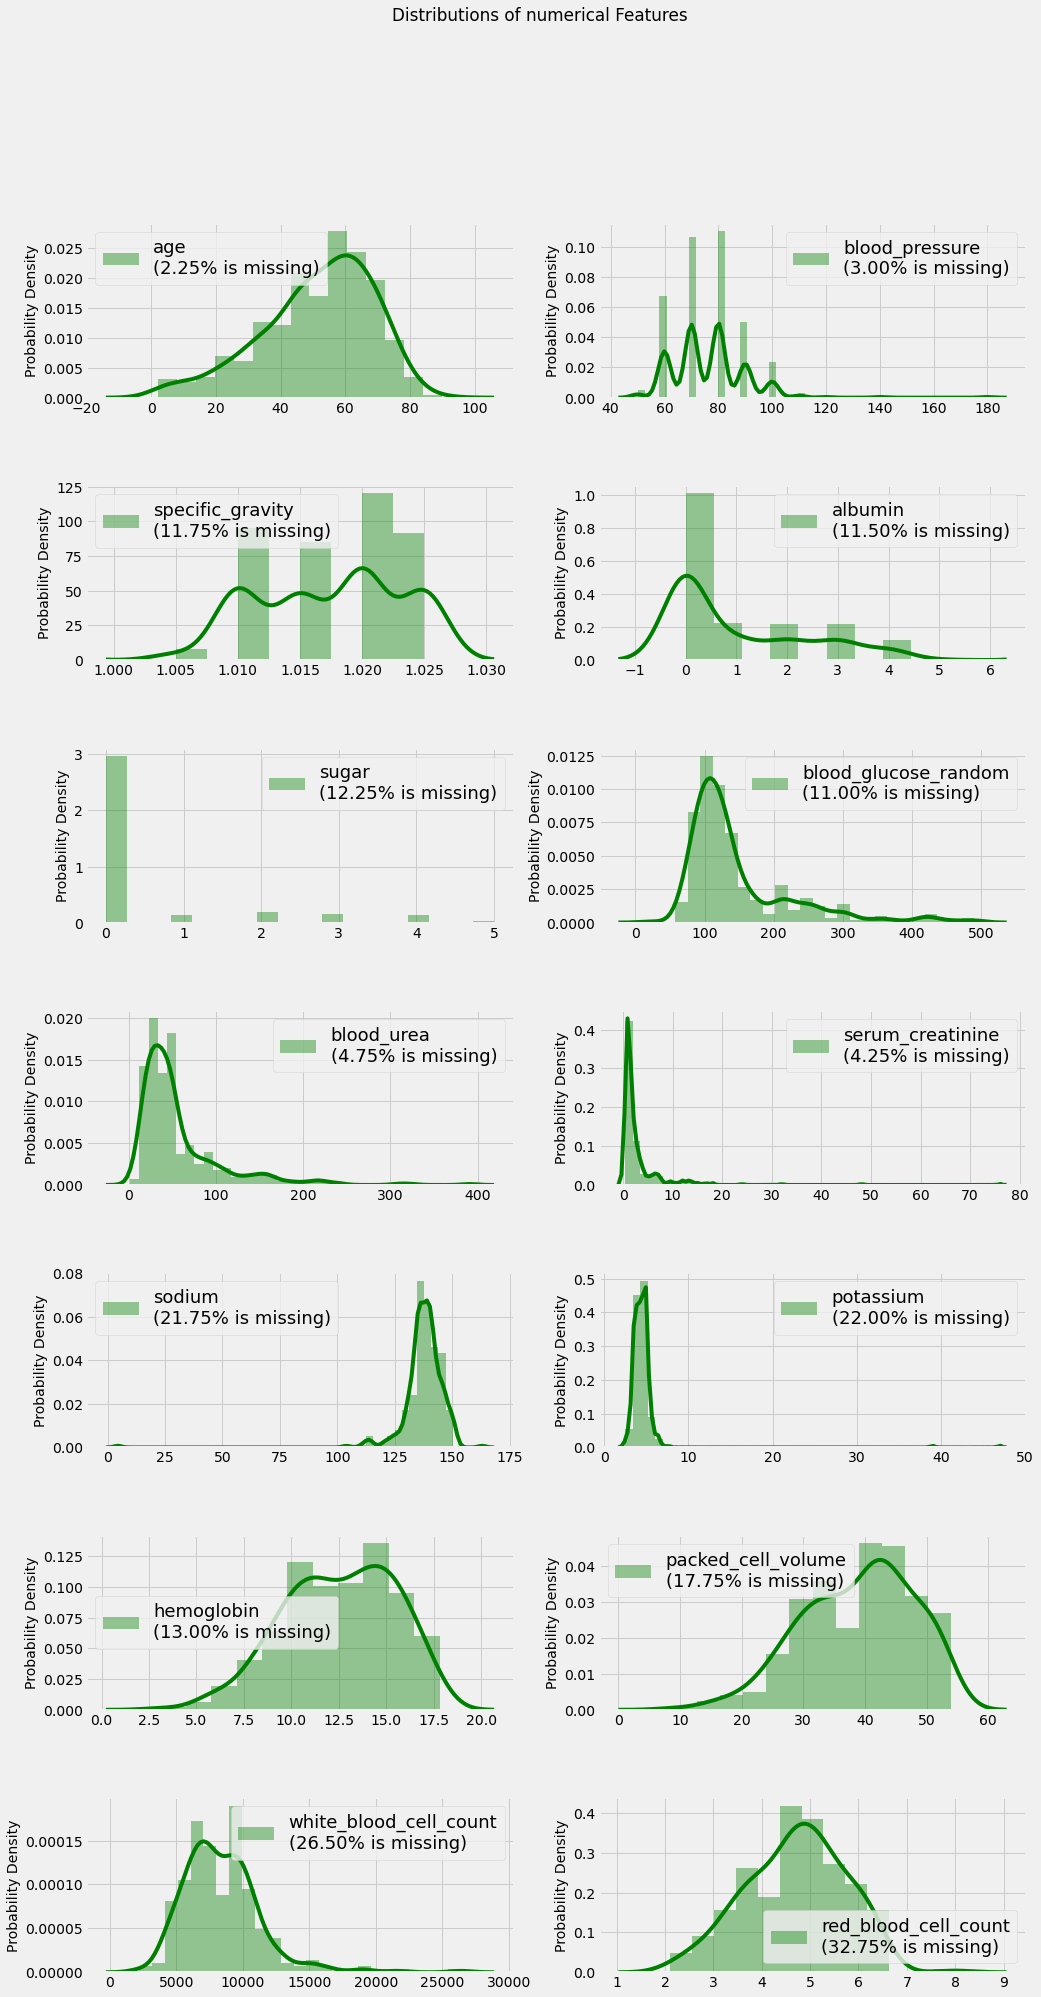

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')

n_rows, n_cols = (7,2)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    miss_perc="%.2f"%(100*(1-(ckd_df[column].dropna().shape[0])/ckd_df.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig=sns.distplot(ckd_df[column], color="green", label=collabel, 
                     norm_hist=True, ax=axes[i,j], kde_kws={"lw":4})
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    axes[i,j].set_xlabel(None)

plt.show()

##### Numeric features:- 

        While diving into detailed EDA we could see that some of the features represent good distributions, 
        some are skewed by right & left and shows us positive and negative insights.  


##### Checking distribution of the Categorical features

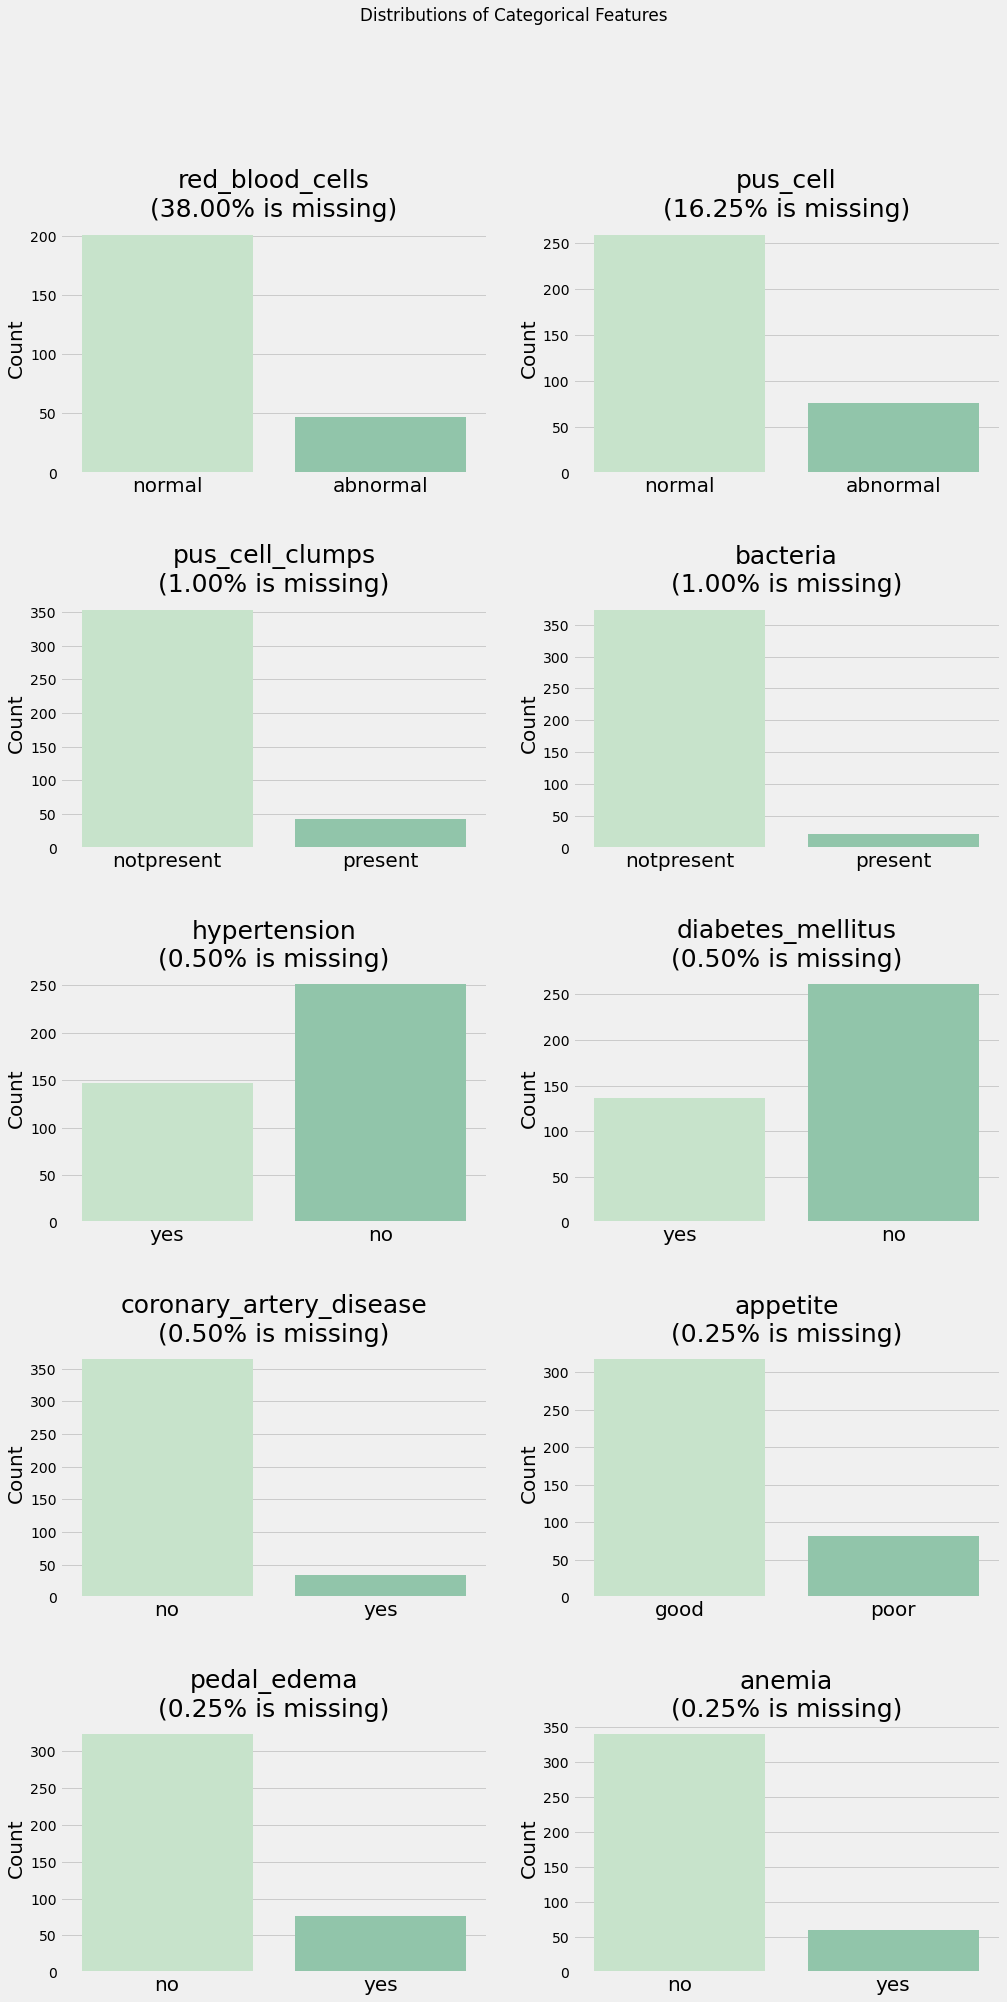

In [15]:
style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Categorical Features')

n_rows, n_cols = (5,2)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    miss_perc="%.2f"%(100*(1-(ckd_df[column].dropna().shape[0])/ckd_df.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig = sns.countplot(x=column, data=ckd_df,label=collabel, 
                        palette=sns.cubehelix_palette(rot=-.4,light=0.85,hue=1), ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=25)
    axes[i,j].set_xlabel(None)
    axes[i,j].set_ylabel("Count",fontsize=20)
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=20)

plt.show()

##### Categorical features:- 
    
    Bar graph is used to analysis categorical values. Since it’s an binary classification dataset, 
    we could see that Most of the uniques features in categorical data we’re ‘good’, ‘poor’, ‘yes’, ‘no’, ‘normal’, ‘abnormal’ and finally our classification label ‘ckd’ and ‘notckd’.


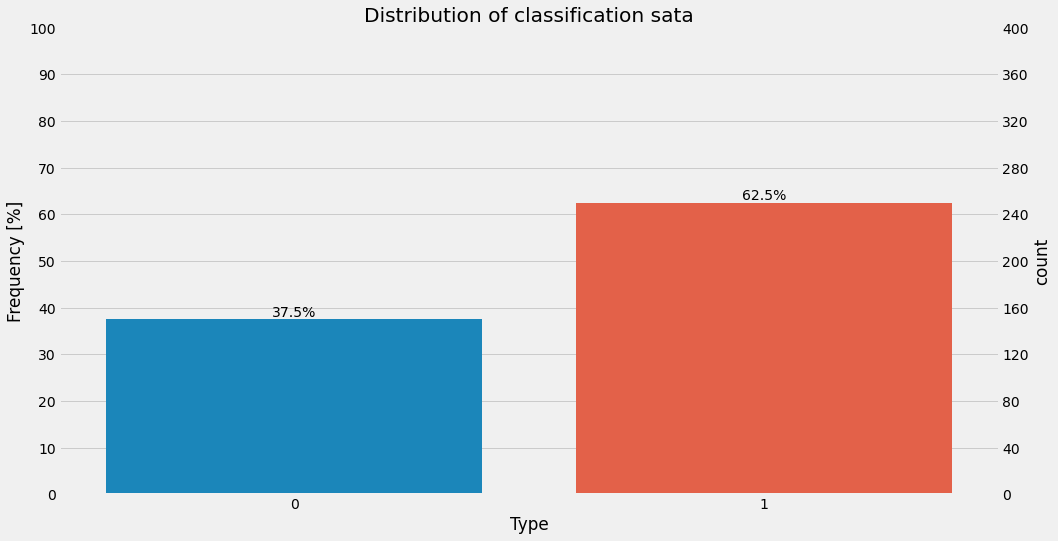

In [16]:
import matplotlib.ticker as ticker
style.use('fivethirtyeight')
# Some random data
ncount = 400

plt.figure(figsize=(15,8))
ax = sns.countplot(x="classification", data=ckd_df)
plt.title('Distribution of classification sata')
plt.xlabel('Type')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

After required taking acting on Missing values using Sklearn package, Outliers were found by checking uniqueness values of each features.

Outliers removal:- 
    
    -Since we don’t have higher level of data outliers. 
    -We took necessary outliers fix based on the domain knowledge by updating invalid data entry. 
    -Removing outliers will help to improve our data quality, which will be resulting in the model performance. 


In [17]:
for i in range(ckd_df.shape[0]):
    if ckd_df.iloc[i,24]=='ckd':
        ckd_df.iloc[i,24]='1'
    if ckd_df.iloc[i,24]=='notckd':
        ckd_df.iloc[i,24]='0'

##### Missing Values

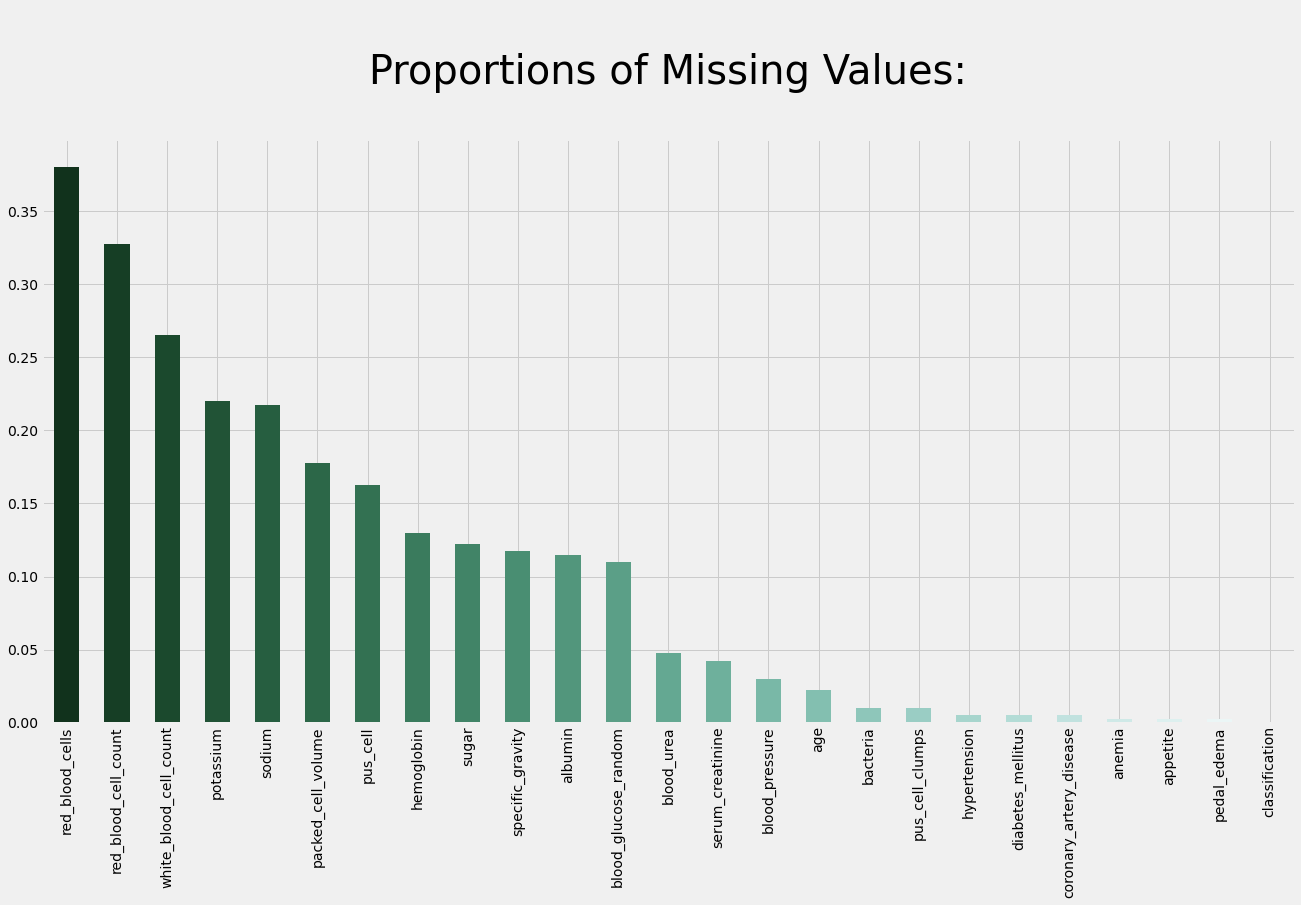

In [18]:
style.use('fivethirtyeight')

d=((ckd_df.isnull().sum()/ckd_df.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

##### Data cleaning 

        Data cleaningprocess were the key to projecting model quality and good accuracy score. 
        In CKD dataset we can clearly view the percentage of Missing values. Which is later handled using Sklearn missing value imputer.
        Sklearn is one of the best library for imputation.    

In [19]:
ckd_df.head(10).T

0           1           2           3  \
age                              48           7          62          48   
blood_pressure                   80          50          80          70   
specific_gravity               1.02        1.02        1.01       1.005   
albumin                           1           4           2           4   
sugar                             0           0           3           0   
red_blood_cells                 NaN         NaN      normal      normal   
pus_cell                     normal      normal      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent     present   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random            121         NaN         423         117   
blood_urea                       36          18          53          56   
serum_creatinine                1.2         0.8         1.8         3.8   
sodium                          NaN         NaN         NaN         111   
potassium                       NaN         NaN         NaN         2.5   
hemoglobin                     15.4        11.3         9.6        11.2   
packed_cell_volume               44          38          31          32   
white_blood_cell_count         7800        6000        7500        6700   
red_blood_cell_count            5.2         NaN         NaN         3.9   
hypertension                    yes          no          no         yes   
diabetes_mellitus               yes          no         yes          no   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        poor        poor   
pedal_edema                      no          no          no         yes   
anemia                           no          no         yes         yes   
classification                    1           1           1           1   

                                  4           5           6           7  \
age                              51          60          68          24   
blood_pressure                   80          90          70         NaN   
specific_gravity               1.01       1.015        1.01       1.015   
albumin                           2           3           0           2   
sugar                             0           0           0           4   
red_blood_cells              normal         NaN         NaN      normal   
pus_cell                     normal         NaN      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent  notpresent   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random            106          74         100         410   
blood_urea                       26          25          54          31   
serum_creatinine                1.4         1.1          24         1.1   
sodium                          NaN         142         104         NaN   
potassium                       NaN         3.2           4         NaN   
hemoglobin                     11.6        12.2        12.4        12.4   
packed_cell_volume               35          39          36          44   
white_blood_cell_count         7300        7800         NaN        6900   
red_blood_cell_count            4.6         4.4         NaN           5   
hypertension                     no         yes          no          no   
diabetes_mellitus                no         yes          no         yes   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        good        good   
pedal_edema                      no         yes          no         yes   
anemia                           no          no          no          no   
classification                    1           1           1           1   

                                  8           9  
age                              52          53  
blood_pressure                  

##### One-Hot Encoding

In [20]:
onehotdata=pd.get_dummies(ckd_df,drop_first=True,prefix_sep=': ')
onehotdata.head(13).T

0        1        2         3        4  \
age                             48.00     7.00    62.00    48.000    51.00   
blood_pressure                  80.00    50.00    80.00    70.000    80.00   
specific_gravity                 1.02     1.02     1.01     1.005     1.01   
albumin                          1.00     4.00     2.00     4.000     2.00   
sugar                            0.00     0.00     3.00     0.000     0.00   
blood_glucose_random           121.00      NaN   423.00   117.000   106.00   
blood_urea                      36.00    18.00    53.00    56.000    26.00   
serum_creatinine                 1.20     0.80     1.80     3.800     1.40   
sodium                            NaN      NaN      NaN   111.000      NaN   
potassium                         NaN      NaN      NaN     2.500      NaN   
hemoglobin                      15.40    11.30     9.60    11.200    11.60   
packed_cell_volume              44.00    38.00    31.00    32.000    35.00   
white_blood_cell_count        7800.00  6000.00  7500.00  6700.000  7300.00   
red_blood_cell_count             5.20      NaN      NaN     3.900     4.60   
classification                   1.00     1.00     1.00     1.000     1.00   
red_blood_cells: normal          0.00     0.00     1.00     1.000     1.00   
pus_cell: normal                 1.00     1.00     1.00     0.000     1.00   
pus_cell_clumps: present         0.00     0.00     0.00     1.000     0.00   
bacteria: present                0.00     0.00     0.00     0.000     0.00   
hypertension: yes                1.00     0.00     0.00     1.000     0.00   
diabetes_mellitus: yes           1.00     0.00     1.00     0.000     0.00   
coronary_artery_disease: yes     0.00     0.00     0.00     0.000     0.00   
appetite: poor                   0.00     0.00     1.00     1.000     0.00   
pedal_edema: yes                 0.00     0.00     0.00     1.000     0.00   
anemia: yes                      0.00     0.00     1.00     1.000     0.00   

                                     5       6         7         8         9  \
age                             60.000   68.00    24.000    52.000     53.00   
blood_pressure                  90.000   70.00       NaN   100.000     90.00   
specific_gravity                 1.015    1.01     1.015     1.015      1.02   
albumin                          3.000    0.00     2.000     3.000      2.00   
sugar                            0.000    0.00     4.000     0.000      0.00   
blood_glucose_random            74.000  100.00   410.000   138.000     70.00   
blood_urea                      25.000   54.00    31.000    60.000    107.00   
serum_creatinine                 1.100   24.00     1.100     1.900      7.20   
sodium                         142.000  104.00       NaN       NaN    114.00   
potassium                        3.200    4.00       NaN       NaN      3.70   
hemoglobin                      12.200   12.40    12.400    10.800      9.50   
packed_cell_volume              39.000   36.00    44.000    33.000     29.00   
white_blood_cell_count        7800.000     NaN  6900.000  9600.000  12100.00   
red_blood_cell_count             4.400     NaN     5.000     4.000      3.70   
classification                   1.000    1.00     1.000     1.000      1.00   
red_blood_cells: normal          0.000    0.00     1.000     1.000      0.00   
pus_cell: normal                 0.000    1.00     0.000     0.000      0.00   
pus_cell_clumps: present         0.000    0.00     0.000     1.000      1.00   
bacteria: present                0.000    0.00     0.000     0.000      0.00   
hypertension: yes                1.000    0.00     0.000     1.000      1.00   
diabetes_mellitus: yes           1.000    0.00     1.000     1.000      1.00   
coronary_artery_disease: yes     0.000    0.00     0.000     0.000      0.00   
appetite: poor                   0.000    0.00     0.000     0.000      1.00   
pedal_edema: yes                 1.000    0.00     1.000     0.000      0.00   
anemia:

In [21]:
# define imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

impute_columns=list(set(onehotdata.columns)-set(["classification"]))
print(impute_columns)

['potassium', 'pus_cell: normal', 'red_blood_cells: normal', 'pus_cell_clumps: present', 'serum_creatinine', 'red_blood_cell_count', 'blood_urea', 'sugar', 'albumin', 'blood_glucose_random', 'anemia: yes', 'hemoglobin', 'bacteria: present', 'age', 'hypertension: yes', 'blood_pressure', 'pedal_edema: yes', 'packed_cell_volume', 'diabetes_mellitus: yes', 'appetite: poor', 'sodium', 'specific_gravity', 'white_blood_cell_count', 'coronary_artery_disease: yes']


In [22]:
imputer.fit(onehotdata[impute_columns])     

KNNImputer()

In [23]:
X_trans=pd.DataFrame(imputer.transform(onehotdata[impute_columns]), columns=impute_columns)

In [24]:
X_trans.head(13).T

0        1        2         3        4  \
potassium                        4.20     3.92     4.20     2.500     3.98   
pus_cell: normal                 1.00     1.00     1.00     0.000     1.00   
red_blood_cells: normal          0.00     0.00     1.00     1.000     1.00   
pus_cell_clumps: present         0.00     0.00     0.00     1.000     0.00   
serum_creatinine                 1.20     0.80     1.80     3.800     1.40   
red_blood_cell_count             5.20     4.96     3.80     3.900     4.60   
blood_urea                      36.00    18.00    53.00    56.000    26.00   
sugar                            0.00     0.00     3.00     0.000     0.00   
albumin                          1.00     4.00     2.00     4.000     2.00   
blood_glucose_random           121.00   113.00   423.00   117.000   106.00   
anemia: yes                      0.00     0.00     1.00     1.000     0.00   
hemoglobin                      15.40    11.30     9.60    11.200    11.60   
bacteria: present                0.00     0.00     0.00     0.000     0.00   
age                             48.00     7.00    62.00    48.000    51.00   
hypertension: yes                1.00     0.00     0.00     1.000     0.00   
blood_pressure                  80.00    50.00    80.00    70.000    80.00   
pedal_edema: yes                 0.00     0.00     0.00     1.000     0.00   
packed_cell_volume              44.00    38.00    31.00    32.000    35.00   
diabetes_mellitus: yes           1.00     0.00     1.00     0.000     0.00   
appetite: poor                   0.00     0.00     1.00     1.000     0.00   
sodium                         137.60   136.80   133.80   111.000   138.40   
specific_gravity                 1.02     1.02     1.01     1.005     1.01   
white_blood_cell_count        7800.00  6000.00  7500.00  6700.000  7300.00   
coronary_artery_disease: yes     0.00     0.00     0.00     0.000     0.00   

                                     5         6         7         8  \
potassium                        3.200      4.00     4.200     4.960   
pus_cell: normal                 0.000      1.00     0.000     0.000   
red_blood_cells: normal          0.000      0.00     1.000     1.000   
pus_cell_clumps: present         0.000      0.00     0.000     1.000   
serum_creatinine                 1.100     24.00     1.100     1.900   
red_blood_cell_count             4.400      4.64     5.000     4.000   
blood_urea                      25.000     54.00    31.000    60.000   
sugar                            0.000      0.00     4.000     0.000   
albumin                          3.000      0.00     2.000     3.000   
blood_glucose_random            74.000    100.00   410.000   138.000   
anemia: yes                      0.000      0.00     0.000     1.000   
hemoglobin                      12.200     12.40    12.400    10.800   
bacteria: present                0.000      0.00     0.000     0.000   
age                             60.000     68.00    24.000    52.000   
hypertension: yes                1.000      0.00     0.000     1.000   
blood_pressure                  90.000     70.00    74.000   100.000   
pedal_edema: yes                 1.000      0.00     1.000     0.000   
packed_cell_volume              39.000     36.00    44.000    33.000   
diabetes_mellitus: yes           1.000      0.00     1.000     1.000   
appetite: poor                   0.000      0.00     0.000     0.000   
sodium                         142.000    104.00   133.800   134.000   
specific_gravity                 1.015      1.01     1.015     1.015   
white_blood_cell_count        7800.000  10280.00  6900.000  9600.000   
coronary_artery_disease: yes     0.000      0.00     0.000     0.000   

                                     9       10       11         12  
potassium                         3.70     4.56     4.20      5.800  
pus_cell: normal                  0.00     0.00     0.00      1.000  
red_blood_cells: normal           0.00     0.00     0.00      0.000  
pus_

In [25]:
X_trans # final datset

potassium  pus_cell: normal  red_blood_cells: normal  \
0         4.20               1.0                      0.0   
1         3.92               1.0                      0.0   
2         4.20               1.0                      1.0   
3         2.50               0.0                      1.0   
4         3.98               1.0                      1.0   
..         ...               ...                      ...   
395       4.90               1.0                      1.0   
396       3.50               1.0                      1.0   
397       4.40               1.0                      1.0   
398       4.90               1.0                      1.0   
399       3.50               1.0                      1.0   

     pus_cell_clumps: present  serum_creatinine  red_blood_cell_count  \
0                         0.0               1.2                  5.20   
1                         0.0               0.8                  4.96   
2                         0.0               1.8                  3.80   
3                         1.0               3.8                  3.90   
4                         0.0               1.4                  4.60   
..                        ...               ...                   ...   
395                       0.0               0.5                  4.90   
396                       0.0               1.2                  6.20   
397                       0.0               0.6                  5.40   
398                       0.0               1.0                  5.90   
399                       0.0               1.1                  6.10   

     blood_urea  sugar  albumin  blood_glucose_random  ...  hypertension: yes  \
0          36.0    0.0      1.0                 121.0  ...                1.0   
1          18.0    0.0      4.0                 113.0  ...                0.0   
2          53.0    3.0      2.0                 423.0  ...                0.0   
3          56.0    0.0      4.0                 117.0  ...                1.0   
4          26.0    0.0      2.0                 106.0  ...                0.0   
..          ...    ...      ...                   ...  ...                ...   
395        49.0    0.0      0.0                 140.0  ...                0.0   
396        31.0    0.0      0.0                  75.0  ...                0.0   
397        26.0    0.0      0.0                 100.0  ...                0.0   
398        50.0    0.0      0.0                 114.0  ...                0.0   
399        18.0    0.0      0.0                 131.0  ...                0.0   

     blood_pressure  pedal_edema: yes  packed_cell_volume  \
0              80.0               0.0                44.0   
1              50.0               0.0                38.0   
2              80.0               0.0                31.0   
3              70.0               1.0                32.0   
4              80.0               0.0                35.0   
..              ...               ...                 ...   
395            80.0               0.0                47.0   
396            70.0               0.0                54.0   
397            80.0               0.0                49.0   
398            60.0               0.0                51.0   
399            80.0               0.0                53.0   

     diabetes_mellitus: yes  appetite: poor  sodium  specific_gravity  \
0                       1.0             0.0   137.6             1.020   
1                       0.0             0.0   136.8             1.020   
2                       1.0             1.0   133.8             1.010   
3                       0.0             1.0   111.0             1.005   
4                       0.0             0.0   138.4             1.010   
..                      ...             ...     ...               ...   
395                     0.0             0.0   150.0             1.020   
396                     0.0             0.0   141.0             1.025   
397                     0.0     

##### Modelling

In [26]:
X=X_trans
y=ckd_df["classification"]



X_prod=X_trans
print(X.shape)
print(y.shape)
print(X_prod.shape)

(400, 24)
(400,)
(400, 24)


###### Predictive Models with hyperparameter tuning Section

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV 

In [28]:
def display_confusion_matrix(y_test,y_pred):
    
    cm = confusion_matrix(y_test, y_pred_lr)
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    print(classification_report(y_test, y_pred))

In [29]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [30]:
##Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4658)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 24)
(80, 24)
(320,)
(80,)


###### StandardScaler data with PCA implementation

#performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

#Applying PCA function on training and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 
explained_variance

##### Logistic Regression Hyper parameter tuning

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.903125
Best estimator is LogisticRegression(C=0.006105402296585327) 


              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.95      0.95      0.95        55

    accuracy                           0.93        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.93      0.93      0.93        80


Accuracy of Logistic Regression is : 0.903125
Computation time 3.078 - Sec


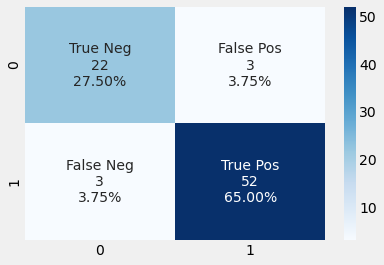

In [31]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 

start_lr = time.time()
lr = GridSearchCV(LogisticRegression(), 
                  param_grid, 
                  cv = 5) 
lr.fit(X_train, y_train) 
end_lr = time.time()
final_lr = end_lr - start_lr
final_lr = round(final_lr,3)
final_lr

# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(lr.best_params_)) 
print("Best score is {}".format(lr.best_score_))
print("Best estimator is {} \n\n".format(lr.best_estimator_))

y_pred_lr = lr.predict(X_test)
display_confusion_matrix(y_test, y_pred_lr)
accuracy_lr=lr.best_score_
print("\nAccuracy of Logistic Regression is :", accuracy_lr)
print("Computation time {} - Sec".format(final_lr))

AUC: 0.91


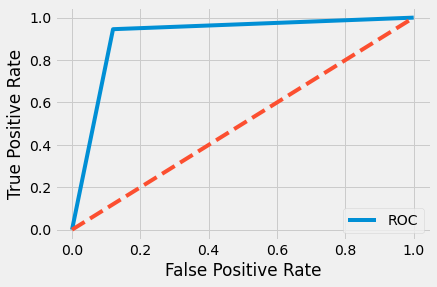

In [32]:
auc = roc_auc_score(y_test, y_pred_lr)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
plot_roc_curve(fpr, tpr)

##### Decision Tree Hyper parameter tuning

Tuned Decision Tree Parameters: {'min_samples_split': 20, 'max_leaf_nodes': 64, 'max_features': 0.6, 'max_depth': 6, 'criterion': 'gini', 'class_weight': {0: 1, 1: 5}}
Best score is 0.9647452125933139
Best estimator is DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=6, max_features=0.6,
                       max_leaf_nodes=64, min_samples_split=20)
              precision    recall  f1-score   support

           0       0.87      0.52      0.65        25
           1       0.82      0.96      0.88        55

    accuracy                           0.82        80
   macro avg       0.84      0.74      0.77        80
weighted avg       0.83      0.82      0.81        80

Accuracy of Decision Tree is : 0.9647452125933139
Computation time 0.531 - Sec


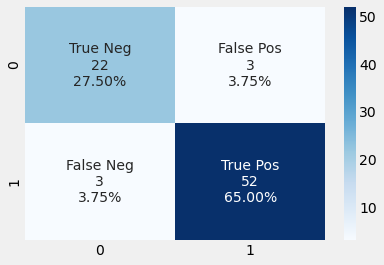

In [33]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

start_dt = time.time()
clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=20)

dt_model = clf.fit(X_train, y_train)
end_dt = time.time()
final_dt = end_dt - start_dt
final_dt = round(final_dt,3)
final_dt

# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(dt_model.best_params_)) 
print("Best score is {}".format(dt_model.best_score_)) 
print("Best estimator is {}".format(dt_model.best_estimator_))

y_pred_dt = dt_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_dt)
accuracy_dt=dt_model.best_score_
print("Accuracy of Decision Tree is :", accuracy_dt)
print("Computation time {} - Sec".format(final_dt))

AUC: 0.74


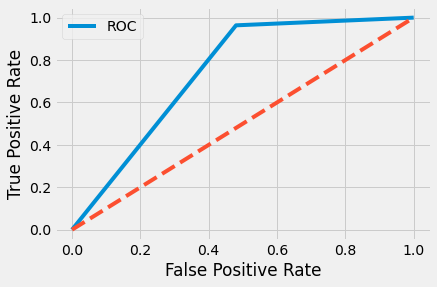

In [34]:
auc = roc_auc_score(y_test, y_pred_dt)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plot_roc_curve(fpr, tpr)

##### Random Forest Hyper parameter tuning

Tuned Random Tree Parameters: {'n_estimators': 32, 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 95, 'min_samples_leaf': 49, 'max_leaf_nodes': 10, 'max_depth': 16}
Best score is 0.9689635259255513
Best estimator is RandomForestClassifier(max_depth=16, max_leaf_nodes=10, min_samples_leaf=49,
                       min_samples_split=95, min_weight_fraction_leaf=0.1,
                       n_estimators=32)
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.98      0.91      0.94        55

    accuracy                           0.93        80
   macro avg       0.90      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80

Accuracy of Random Forests model is : 0.9689635259255513
Computation time 20.715 - Sec


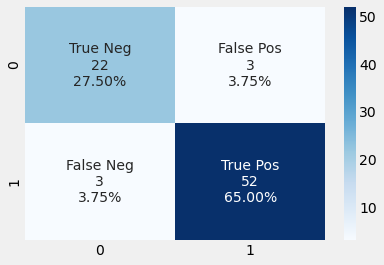

In [35]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {"n_estimators": np.arange(2, 300, 2),
              "max_depth": np.arange(1, 28, 1),
              "min_samples_split": np.arange(1,150,1),
              "min_samples_leaf": np.arange(1,60,1),
              "max_leaf_nodes": np.arange(2,60,1),
              "min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)}

start_rf = time.time()
rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_grid,
                         scoring='f1',
                         random_state=4658,
                         n_iter=20)

rf_model = rf.fit(X_train, y_train)
end_rf = time.time()
final_rf = end_rf - start_rf
final_rf = round(final_rf,3)
final_rf

# Print the tuned parameters and score 
print("Tuned Random Tree Parameters: {}".format(rf_model.best_params_)) 
print("Best score is {}".format(rf_model.best_score_)) 
print("Best estimator is {}".format(rf_model.best_estimator_))

y_pred_rf = rf_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_rf)
accuracy_rf=rf_model.best_score_
print("Accuracy of Random Forests model is :", accuracy_rf)
print("Computation time {} - Sec".format(final_rf))

AUC: 0.93


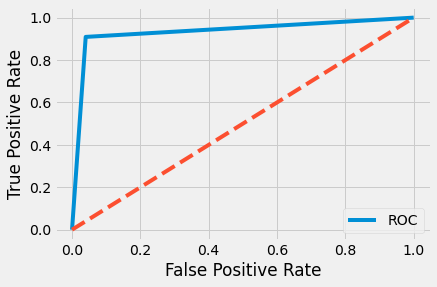

In [36]:
auc = roc_auc_score(y_test, y_pred_rf)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plot_roc_curve(fpr, tpr)

##### Support Vector Machine Hyper parameter tuning

In [37]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

start_svm = time.time()
svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
svm.fit(X_train, y_train)

end_svm = time.time()
final_svm = end_svm - start_svm
final_svm = round(final_svm,3)
final_svm

# Print the tuned parameters and score 
print("Tuned Support Vector Machine Parameters: {}".format(svm.best_params_)) 
print("Best score is {}".format(svm.best_score_))
print("Best estimator is {}".format(svm.best_estimator_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.609, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.609, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.609, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.609, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.609, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[CV] ................... C=100, gamma=0.01, score=0.609, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.750, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.797, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.719, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.688, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.828, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.703, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.2s finished


              precision    recall  f1-score   support

           0       0.83      0.60      0.70        25
           1       0.84      0.95      0.89        55

    accuracy                           0.84        80
   macro avg       0.84      0.77      0.79        80
weighted avg       0.84      0.84      0.83        80

Accuracy of Support Vector Machine is : 0.75625
Computation time 1.182 - Sec


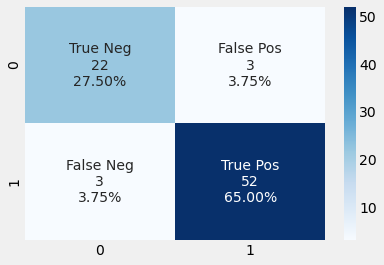

In [38]:
y_pred_svm = svm.predict(X_test)
display_confusion_matrix(y_test, y_pred_svm)
accuracy_svm=svm.best_score_
print("Accuracy of Support Vector Machine is :", accuracy_svm)
print("Computation time {} - Sec".format(final_svm))

AUC: 0.77


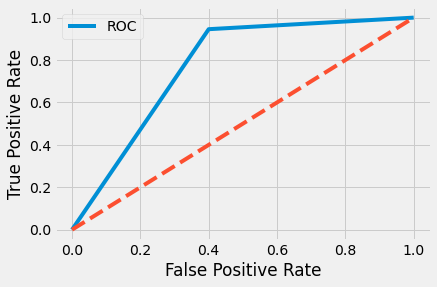

In [39]:
auc = roc_auc_score(y_test, y_pred_svm)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fpr, tpr)

##### Artificial neural network

In [40]:
from sklearn.neural_network import MLPClassifier

# defining parameter range
param_grid = { 
              'max_iter': [1000],
            } 

start_mlp = time.time()
mlp = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
mlp.fit(X_train, y_train.values.ravel())

end_mlp = time.time()
final_mlp = end_mlp - start_mlp
final_mlp = round(final_mlp,3)
final_mlp

# Print the tuned parameters and score 
print("Tuned Artificial neural network Parameters: {}".format(mlp.best_params_)) 
print("Best score is {}".format(mlp.best_score_))
print("Best estimator is {}".format(mlp.best_estimator_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.734, total=   0.2s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.609, total=   0.0s
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... max_iter=1000, score=0.859, total=   0.1s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.797, total=   0.2s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.609, total=   0.0s
Tuned Artificial neural network Parameters: {'max_iter': 1000}
Best score is 0.721875
Best estimator is MLPClassifier(max_iter=1000)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.98      0.87      0.92        55

    accuracy                           0.90        80
   macro avg       0.88      0.92      0.89        80
weighted avg       0.92      0.90      0.90        80

Accuracy of Artificial neural network  is : 0.721875
Computation time 0.663 - Sec


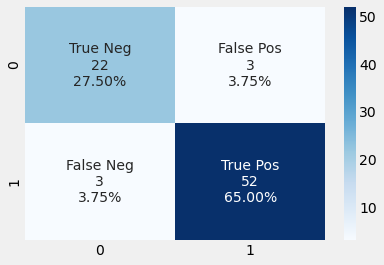

In [41]:
y_pred_mlp = mlp.predict(X_test)
display_confusion_matrix(y_test, y_pred_mlp)
accuracy_mlp=mlp.best_score_
print("Accuracy of Artificial neural network  is :", accuracy_mlp)
print("Computation time {} - Sec".format(final_mlp))

AUC: 0.92


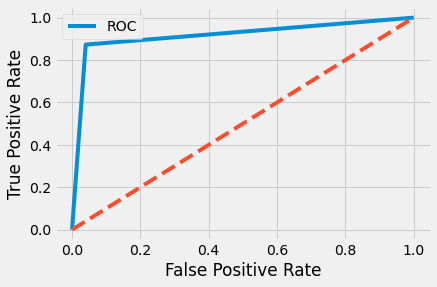

In [42]:
auc = roc_auc_score(y_test, y_pred_mlp)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_mlp)
plot_roc_curve(fpr, tpr)

##### k Nearest Neighbors

Tuned Logistic Regression Parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}
Best score is 0.68125
Best estimator is KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=7, weights='distance') 


              precision    recall  f1-score   support

           0       0.44      0.64      0.52        25
           1       0.80      0.64      0.71        55

    accuracy                           0.64        80
   macro avg       0.62      0.64      0.62        80
weighted avg       0.69      0.64      0.65        80


Accuracy of k Nearest Neighbors is 	: 0.6375
Best Accuracy of k Nearest Neighbors is : 0.68125
Computation time 17.424 - Sec


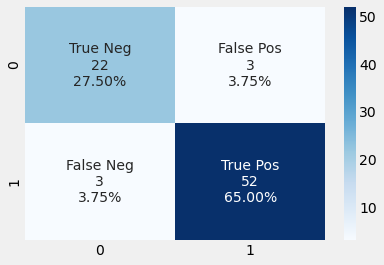

In [43]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_jobs=-1)
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

start_knn = time.time()
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(X_train, y_train)
end_knn = time.time()
final_knn = end_knn - start_knn
final_knn = round(final_knn,3)
final_knn

# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(model1.best_params_)) 
print("Best score is {}".format(model1.best_score_))
print("Best estimator is {} \n\n".format(model1.best_estimator_))

y_pred_knn = model1.predict(X_test)
display_confusion_matrix(y_test, y_pred_knn)
accuracy_knn=accuracy_score(y_test, y_pred_knn)
print("\nAccuracy of k Nearest Neighbors is \t:", accuracy_knn)
print("Best Accuracy of k Nearest Neighbors is : {}".format(model1.best_score_))
print("Computation time {} - Sec".format(final_knn))

AUC: 0.64


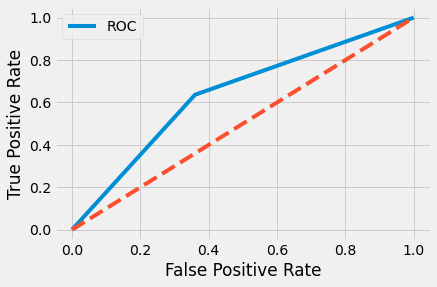

In [44]:
auc = roc_auc_score(y_test, y_pred_knn)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
plot_roc_curve(fpr, tpr)

##### Naive Bayes (NB) Classifier

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       1.00      0.91      0.95        55

    accuracy                           0.94        80
   macro avg       0.92      0.95      0.93        80
weighted avg       0.95      0.94      0.94        80

Gaussian Naive Bayes model accuracy : 0.9375
Computation time 0.005 - Sec


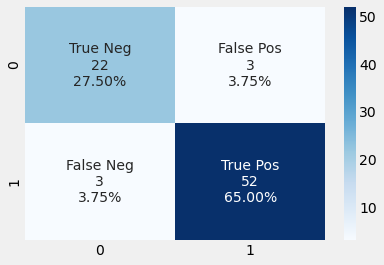

In [45]:
from sklearn.naive_bayes import GaussianNB

start_nb = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
nb_model = gnb.fit(X_train, y_train)
end_nb = time.time()
final_nb = end_nb - start_nb
final_nb = round(final_nb,3)
final_nb

y_pred_nb = gnb.predict(X_test)

display_confusion_matrix(y_test, y_pred_nb)
accuracy_nb=accuracy_score(y_test, y_pred_nb)
print("Gaussian Naive Bayes model accuracy :", accuracy_nb)
print("Computation time {} - Sec".format(final_nb))

AUC: 0.95


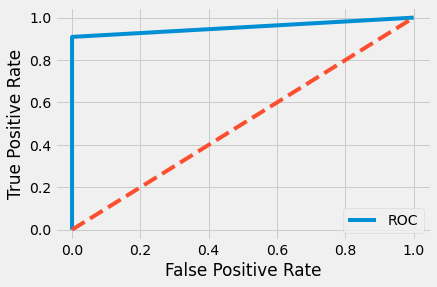

In [46]:
auc = roc_auc_score(y_test, y_pred_nb)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
plot_roc_curve(fpr, tpr)

In [47]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'Artificial neural network'],
    'Score': [accuracy_lr, accuracy_nb , accuracy_dt, accuracy_rf, svm.best_score_, model1.best_score_, mlp.best_score_]})
models.sort_values(by='Score', ascending=False)

Model     Score
3              Random Forest  0.968964
2              Decision Tree  0.964745
1                Naive Bayes  0.937500
0        Logistic Regression  0.903125
4    Support Vector Machines  0.756250
6  Artificial neural network  0.721875
5      K - Nearest Neighbors  0.681250

In [48]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(models, x='Model', y='Score', color="Model", title="Model Comparison")
fig.show()

In [49]:
model = models["Model"]

fig = go.Figure()
fig.add_trace(go.Bar(x=model,
                y=models["Score"],
                name='Without dimensionality reduction',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=model,
                y=[0.978125,1.000000, 0.987277, 0.987277, 0.987500, 0.984375, 0.981250],
                name='With PCA',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='US Export of Plastic Scrap',
    xaxis_tickfont_size=10,
    yaxis=dict(
        title='USD (millions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

Insights,
        
   24 data recording information of 400 people such as age, blood pressure, density, diabetes were used as attributes. Clinical records were examined to determine whether chronic kidney disease was present or not, and provided a high accuracy rate with machine learning methods.

   Chronic kidney disease is a disease that hinders the normal functions of the kidney and damages the kidneys. It is one of the common diseases in the world and the prediction of the disease is one of the basic issues in medical diagnosis. Chronic kidney disease is one of the leading causes of death worldwide. Early detection of this disease is very important in terms of health and treatment costs. Many machine learning algorithms have been used in the literature to predict the disease.

   Here, seven different classifiers were utilized in determining the targeted chronic kidney disease and the best performing classifier was tried to be found. These algorithms were compared on the basis of accuracy, sensitivity, sensitivity, recall and f1 score. When the results were evaluated with the data used in this study, it was seen that the **Random Forest and SVM** method (with an accuracy of 99.16%) performed better than other classification algorithms.

   Here by concluding the **Naive Bayes** is normally giving good accuracy score with taken dataset and notably **Naive Bayes** is overfitting after implementing dimensionality reduction with PCA (2 components)